<a href="https://colab.research.google.com/github/pierrout/AIML/blob/main/RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import *

# **Dunder**



*   Name Mangling
    *  nome de um atributo em uma classe com o objetivo de evitar conflitos de nomes quando uma classe é herdada.
      *ex: __atributo --> _NomeDaClasse__atributo  
*   *Convenção* para indicar privado
    *   quando colocar dois underscores é para indicar **fortemente** que um método ou atributo não deve ser acessado diretamente fora da classe





In [2]:
class LinearRegression:
    def __init__(self, x, y):
      self.x = x
      self.y = y
      self.__correlation_coefficient = self.__correlacao()
      self.__inclination = self.__inclinacao()
      self.__intercept = self.__interceptacao()

    # Cálculo da variação
    # método que retorna uma matriz, e quero especificamente a covariacao de x e y. Por isso o [0][1]
    def __correlacao(self):
      covariacao = cov(self.x, self.y, bias=True)[0][1]
      variancia_x = var(self.x)
      variancia_y = var(self.y)
      return covariacao / sqrt(variancia_x * variancia_y)

    ## inclinação é a correlação x o desvio padrao Y / desvio padrao X
    def __inclinacao(self):
      #funções para calcular desvio padrao
      stdx = std(self.x)
      stdy = std(self.y)
      return self.__correlation_coefficient * (stdy / stdx)

    # para a interceptação precisa da média de x e y, além da inclinação
    def __interceptacao(self):
      mediax = mean(self.x)
      mediay = mean(self.y)
      return mediay - mediax * self.__inclination

    # para a previsão preciso da interceptaçãO + inclinação
    def previsao(self, valor):
      return self.__intercept + (self.__inclination * valor)


In [3]:
## colocando o x = 6 eu quero prever o valor de Y
x = array([1,2,3,4,5])
y = array([2,4,6,8,10])

lr = LinearRegression(x,y)
previsao = lr.previsao(6)
print(previsao)

12.0


## **Regressão Linear com StatsModels**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import scipy.stats as stats

In [6]:
base = pd.read_csv('/mt_cars.csv')
base.shape

(32, 12)

In [7]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2




*   OBS: para ter um bom modelo de regressão linear é a correlação
*   A correlação mostra a força e direção das variáveis
*   Processo para escolher qual melhor variável indepente para o modelo
*   mpg como variável dependente, o que quer prever



In [8]:
base = base.drop(['Unnamed: 0'], axis=1)

<Axes: >

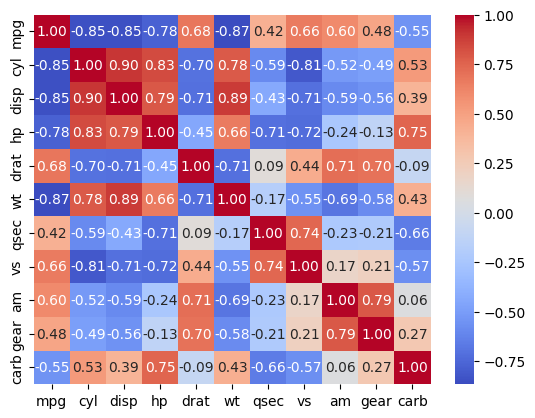

In [10]:
# corr ta gerando um objeto que retorna uma matriz dessas correlações
# heatmap para o gráfico
corr = base.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

<function matplotlib.pyplot.show(close=None, block=None)>

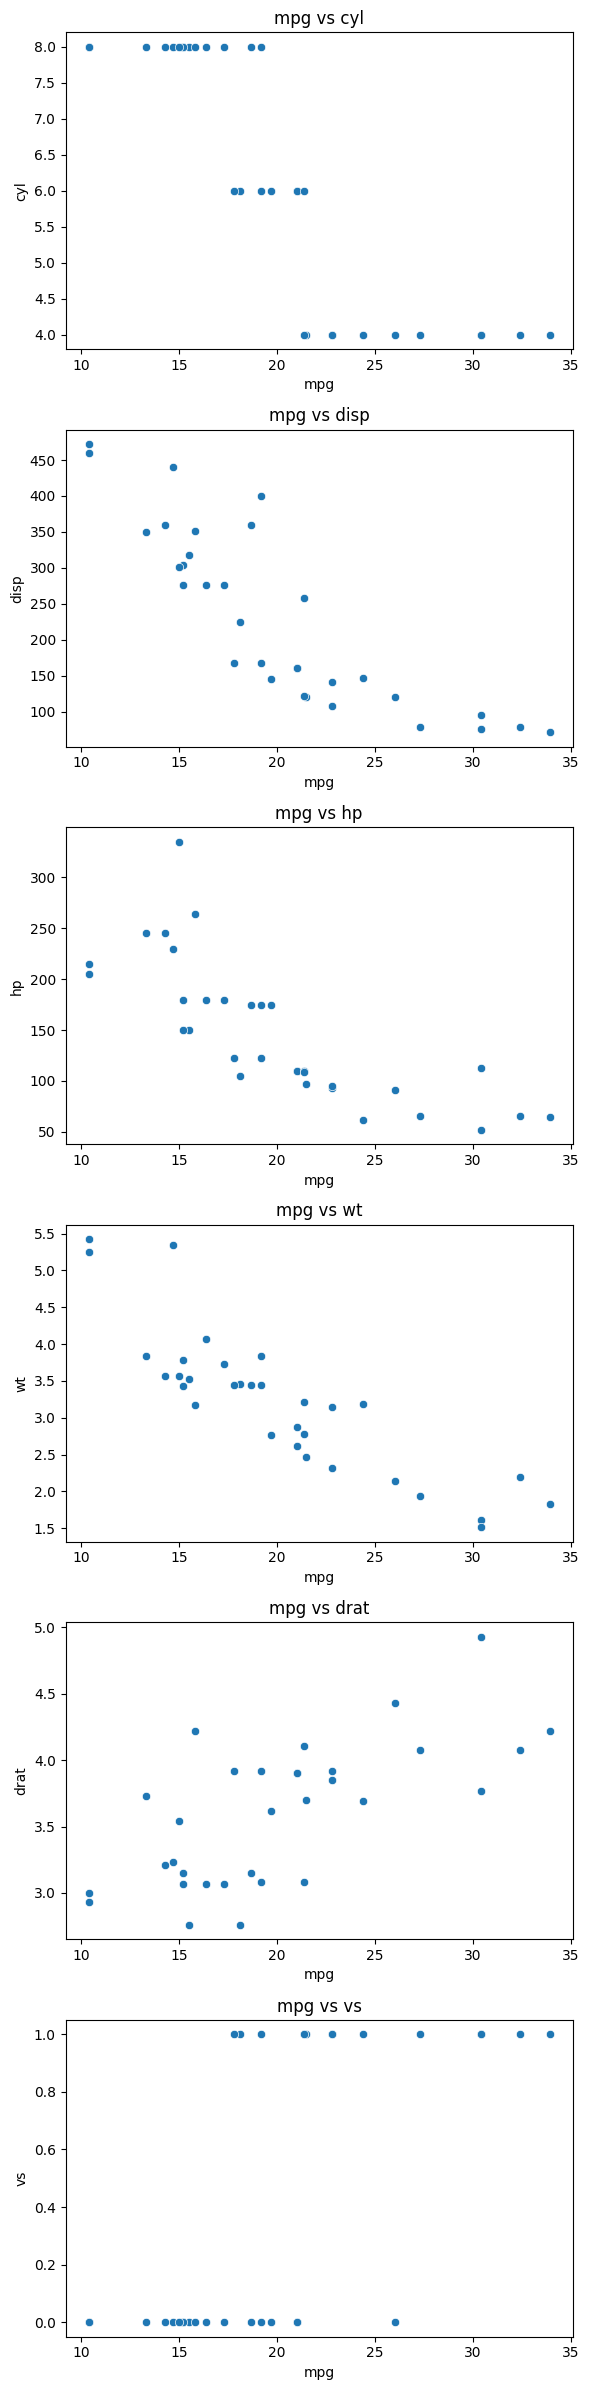

In [12]:
column_pairs = [('mpg','cyl'),('mpg','disp'),('mpg','hp'),('mpg','wt'),('mpg','drat'),('mpg','vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

for i, pair in enumerate(column_pairs):
  x_col, y_col = pair
  sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
  axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show

In [13]:
# var dependente a esquerda e var independente a direita
# aic 156.6 bic 162.5
modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=base)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           8.65e-11
Time:                        01:03:32   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000      32.782      41.429
wt            -3.8009      1.066     -3.565      0.001      -5.985      -1.617
disp          -0.0009      0.010     -0.091      0.929      -0.022       0.020
hp            -0.0312      0.011     -2.724      0.011      -0.055      -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

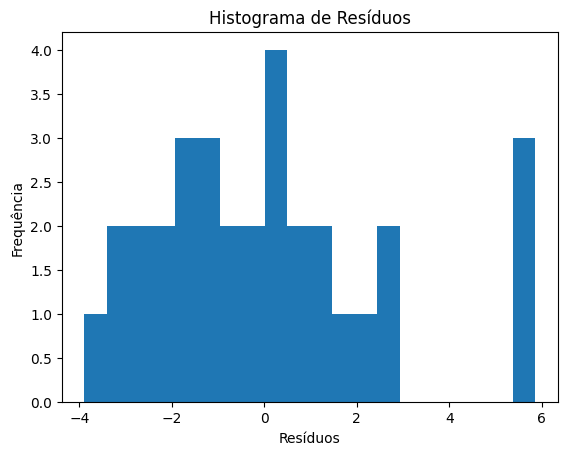

In [14]:
# analisando os residuais
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma de Resíduos")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

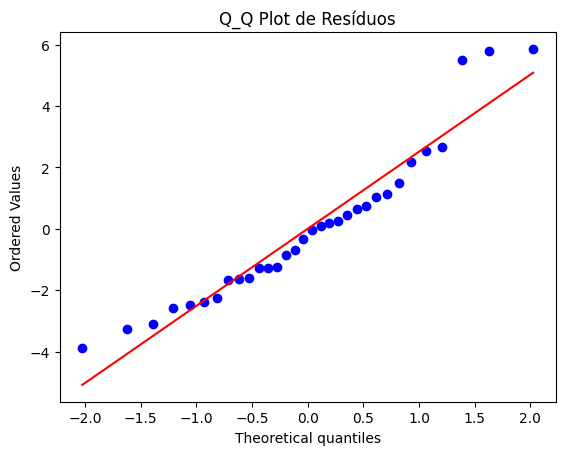

In [18]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q_Q Plot de Resíduos")
plt.show

# **Teste de hipótese Shapiro Yuk**
*   teste estatisco
*   0.927, quanto mais próximo de 1 melhor
*   hipótese nula dados estão normalmente distribuídos
*   deve-se olhar para o valor p para avaliar se vai rejeitar ou não a hipótese nula
*   então se o valor de p <= 0.05 rejeito a hipótese nula (pois não estão normalmente distribuídos)
*   p > 0.05 não é possível rejeitar a hipótese nula

In [19]:
# o p-value é 0.033, ou seja, rejeitado.
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk Estatística: {stat: .3f}, p-value: {pval: .3f}')

Shapiro-Wilk Estatística:  0.927, p-value:  0.033


In [21]:
# como não ajudou mt os modelos anteriormente, então colocar outro conjunto de variáveis
# aic 165.1 bic 169.5
# aumentou, o que no ponto de vista da perfomance não é bom
modelo2 = sm.ols(formula='mpg ~ disp + cyl', data=base)
modelo2 = modelo2.fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.06e-09
Time:                        01:35:31   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# valor do p é aceito
residuos2 = modelo2.resid

stat, pval = stats.shapiro(residuos2)
print(f'Shapiro-Wilk Estatística: {stat: .3f}, p-value: {pval: .3f}')

Shapiro-Wilk Estatística:  0.942, p-value:  0.085


In [24]:
# o valor de p foi aceito mas em perfomance não
modelo3 = sm.ols(formula='mpg ~ drat + vs', data=base)
modelo3 = modelo3.fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           5.82e-07
Time:                        01:42:46   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

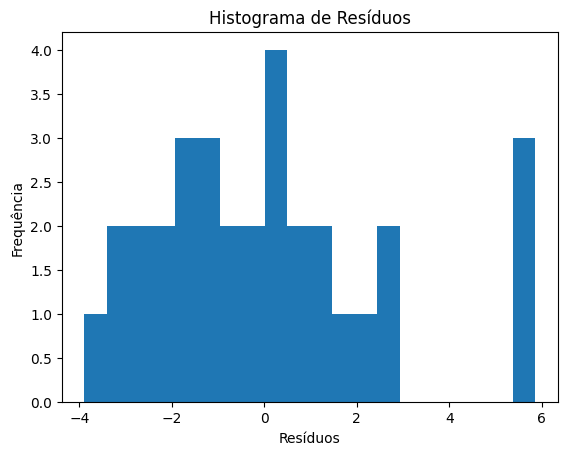

In [25]:
# se fosse desenhar uma linha, pareceria um sino
residuos3 = modelo3.resid
plt.hist(residuos, bins=20)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Histograma de Resíduos")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

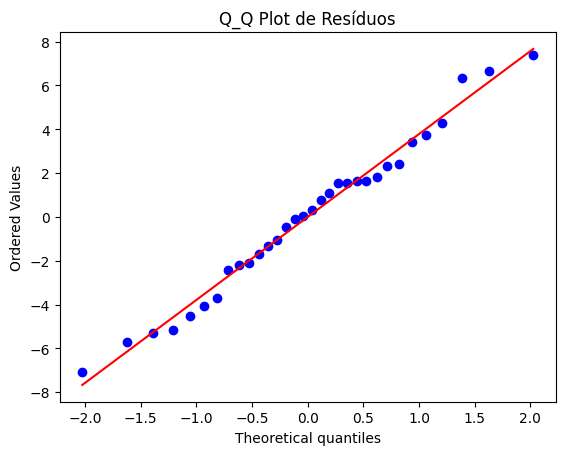

In [26]:
# pontos muito mais próximos da linha
stats.probplot(residuos3, dist="norm", plot=plt)
plt.title("Q_Q Plot de Resíduos")
plt.show

In [27]:
# valor do p é aceito
# passou de 0.08 para 0.8 então é fortemente distribuido
residuos3 = modelo3.resid

stat, pval = stats.shapiro(residuos3)
print(f'Shapiro-Wilk Estatística: {stat: .3f}, p-value: {pval: .3f}')

Shapiro-Wilk Estatística:  0.981, p-value:  0.822
